In [1]:
import numpy as np
from PIL import Image
from scipy import ndimage
from matplotlib import pyplot as plt
import os

In [2]:
os.getcwd()

'D:\\Learn\\大三下\\summer'

In [3]:
path="D:\\Learn\\大三下\\summer\\IMG_A"
os.chdir(path)

In [4]:
os.getcwd()

'D:\\Learn\\大三下\\summer\\IMG_A'

In [5]:
import skimage.io as io

In [6]:
#导入全部图片
str=path + '/*.tif'
img = io.ImageCollection(str)

In [7]:
print(len(img))

998


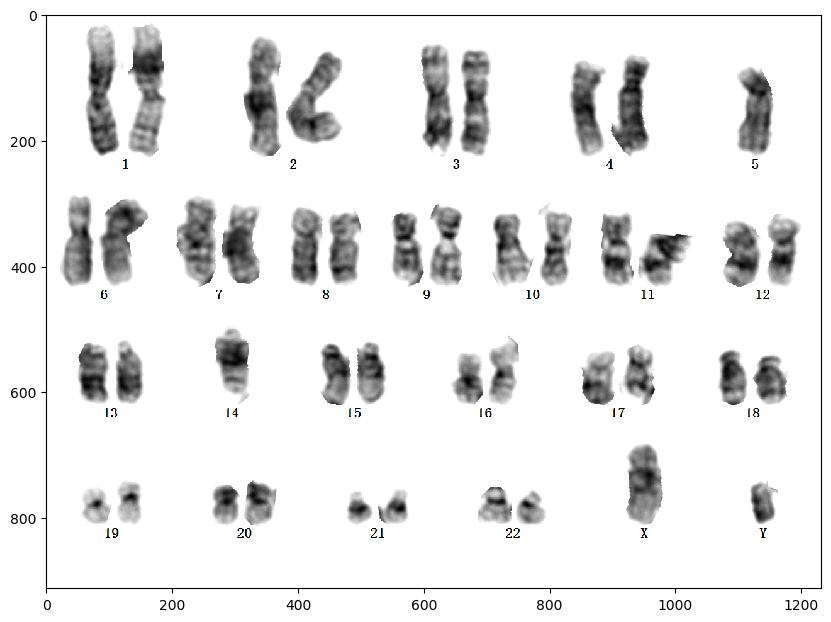

In [8]:
plt.figure(figsize=(10, 10),dpi=100)
plt.imshow(img[0])

In [18]:
#循环998图片导出两个9号染色体
for j in range(0,998):
    gray_img = img[j][270:490, 530:730, 0] 
    labeled, nb_objects = ndimage.label(gray_img < 255)
    chr_img = labeled.copy()
    threshold = 1000
    for i in range(nb_objects+1):
        if len(np.where(chr_img == i)[0]) < threshold:
            chr_img[chr_img == i] = 0
    
    new_labeled, new_nb_objects = ndimage.label(chr_img) 

#slice1 = slice(290, 430, None)
#slice2 = slice(600, 750, None)
    
#slice_p = new_labeled[290:430, 600:750]

#slice_labeled, slice_nb_objects = ndimage.label(slice_p) 

#for i in range(slice_nb_objects+1):
    #if len(np.where(slice_labeled == i)[0]) < 2000:
        #slice_labeled[slice_labeled == i] = 0

    sample_chr9 = new_labeled == 1
    bbox = ndimage.find_objects(sample_chr9)
    slice1 = bbox[0][0]
    slice2 = bbox[0][1]
    a = img[j][270:490, 530:730, :]
    plt.figure(figsize=(0.09, 0.15), dpi=100)
    #plt.imshow(a[slice1, slice2,:])
    plt.axis('off')
    

    path='D:\\Learn\\大三下\\summer\\Normal_9left'
    os.chdir(path)
    plt.imsave(repr(j+1)+'l'+'.png',a[slice1, slice2,:],dpi=1000)
    
    sample_chr22 = new_labeled == 2
    bbox = ndimage.find_objects(sample_chr22)
    slice1 = bbox[0][0]
    slice2 = bbox[0][1]
    a = img[j][270:490, 530:730, :]
    plt.figure(figsize=(0.09, 0.15), dpi=100)
    #plt.imshow(a[slice1, slice2,:])
    plt.axis('off')
    
    path='D:\\Learn\\大三下\\summer\\Normal_9right'
    os.chdir(path)
    plt.imsave(repr(j+1)+'r'+'.png',a[slice1, slice2,:],dpi=1000)

D:\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2618: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)
C:\Users\sz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\sz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


IndexError: list index out of range

ValueError: x and y can be no greater than 2-D, but have shapes (912,) and (912, 1232, 3)

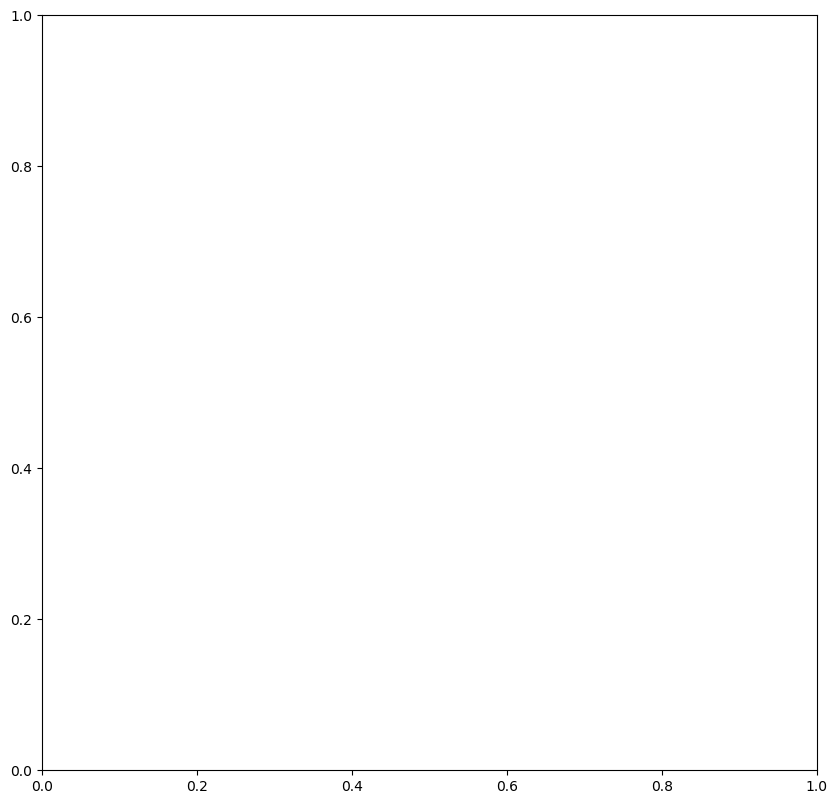

In [17]:
plt.figure(figsize=(10, 10),dpi=100)
plt.plot(img[0])
path='D:\\Learn\\大三下\\summer\\Normal_9left'
os.chdir(path)
plt.savefig('1l'+'.png',dpi=1000)